In [25]:
import cv2
import random
from matplotlib import pyplot as plt
import numpy as np


In [26]:
img1 = cv2.imread('IMG_2095.jpeg')
img2 = cv2.imread('IMG_2096.jpeg')

In [27]:
s = cv2.SIFT_create()

In [28]:
kp_1, desc_1 = s.detectAndCompute(img1, None)
kp_2, desc_2 = s.detectAndCompute(img2, None)

In [29]:
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(desc_1,desc_2)

In [30]:
l1 = np.array([kp_1[match.queryIdx].pt for match in matches])
l2 = np.array([kp_2[match.trainIdx].pt for match in matches])
F, mask = cv2.findFundamentalMat(np.array(l1), np.array(l2),method=cv2.FM_8POINT+cv2.FM_RANSAC)
inlier_matches = [matches[i] for i in range(len(matches)) if mask[i]]


(np.float64(-0.5), np.float64(17135.5), np.float64(3212.5), np.float64(-0.5))

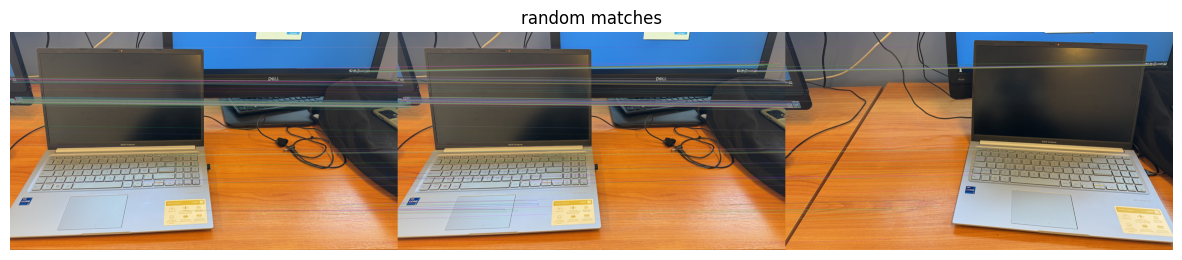

In [15]:
img2 = cv2.drawMatches(img1,kp_1,img2,kp_2,inlier_matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(15,16))
plt.imshow(img2[:,:,::-1]), plt.title('random matches')
plt.axis('off')

In [12]:
len(matches)

5700

Maximum des points 

In [31]:
l1_inliers = l1[mask.ravel() == 1]
l2_inliers = l2[mask.ravel() == 1]
d = l2_inliers - l1_inliers  
norms = np.linalg.norm(l2_inliers - l1_inliers , axis=1)  # Norme euclidienne pour chaque déplacement


In [18]:
max_idx = np.argmax(norms)  # Index du déplacement maximal
max_displacement = d[max_idx]  # Vecteur de déplacement avec la norme maximale
max_inlier_match = inlier_matches[max_idx] 

In [22]:
print(np.max(norms))

4224.0493164924565


In [19]:
print(f"Déplacement maximal : {max_displacement}")
print(f"Norme du déplacement maximal : {norms[max_idx]}")

Déplacement maximal : [4216.35662842 -254.8125    ]
Norme du déplacement maximal : 4224.0493164924565


(np.float64(-0.5), np.float64(11423.5), np.float64(3212.5), np.float64(-0.5))

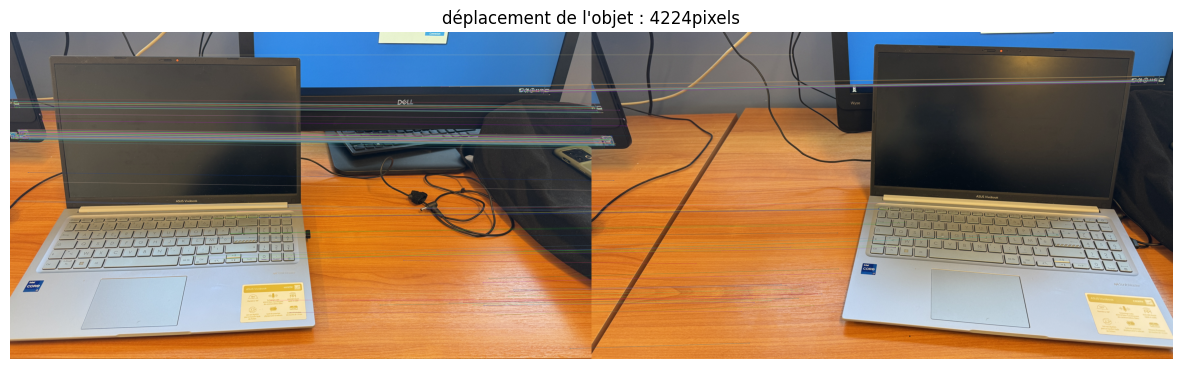

In [32]:
img2 = cv2.drawMatches(img1,kp_1,img2,kp_2,inlier_matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(15,16))
plt.imshow(img2[:,:,::-1]), plt.title(f'déplacement de l\'objet : {int(np.max(norms))}pixels')
plt.axis('off')